### Web Scraping Tutorial (Books to Scrape Edition)
This tutorial will guide you step-by-step on how to use Selenium and BeautifulSoup to scrape book listings from a legal website designed for educational purposes. We'll also use Pandas to store the scraped data in a CSV file.

**Website used:** [https://books.toscrape.com](https://books.toscrape.com)

This website is explicitly created for practicing scraping and allows full access via robots.txt.

**Tools:** Selenium, BeautifulSoup, Pandas, WebDriver.

**Legal Considerations:** This site allows scraping. Always verify robots.txt and terms of service before scraping other sites.

## Step 1: Install Required Libraries
Install the required libraries using:
```bash
%pip install selenium beautifulsoup4 pandas
```
Download the appropriate WebDriver (e.g., ChromeDriver) and ensure it is in your system PATH.

## Step 2: Import Libraries
We import Selenium to control the browser, BeautifulSoup for HTML parsing, Pandas for data handling, and time for delays.

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3: Initialize WebDriver
We launch the Chrome WebDriver to open the browser window.

In [15]:
driver = webdriver.Chrome()

In [16]:
search_keyword = "science"

## Step 4: Build and Open URL
We define the target category and build the corresponding URL to scrape book data from.

In [17]:
url = f'https://books.toscrape.com/catalogue/category/books/{search_keyword}_22/index.html'


In [18]:
driver.get(url)
time.sleep(5)

In [19]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'product_pod')))

<selenium.webdriver.remote.webelement.WebElement (session="a33273677b8571036db54498815db0bf", element="f.62D634B61F4DFE2E645733D147F694DA.d.1A48555A6DEC900104D09C29DECB1E9C.e.24")>

## Step 5: Wait for Page to Load
We wait for the books section to be visible using WebDriverWait.

In [20]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [21]:
job_listings = soup.find_all('div', class_='sc-jv5lm6-0')

## Step 6: Extract Book Data
We use BeautifulSoup to parse and extract information like title, price, and availability from each book on the page.

In [22]:
books = []
book_items = soup.find_all('article', class_='product_pod')

rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

for item in book_items:
    title = item.h3.a['title']
    price = item.find('p', class_='price_color').text.strip()
    availability = item.find('p', class_='instock availability').text.strip()
    
    # rating
    rating_tag = item.find('p', class_='star-rating')
    rating_class = rating_tag['class'][1] if rating_tag and len(rating_tag['class']) > 1 else None
    rating = rating_map.get(rating_class, None)
    
    # Link
    partial_link = item.h3.a['href']
    full_link = 'https://books.toscrape.com/catalogue/' + partial_link.replace('../../../', '')
    
    books.append({
        'Title': title,
        'Price': price,
        'Availability': availability,
        'Rating': rating,
        'Link': full_link
    })

## Step 7: Store Data in DataFrame
We convert the list of books into a Pandas DataFrame for further analysis.

In [23]:
df = pd.DataFrame(books)
df.shape

(14, 5)

In [28]:
df.to_csv('books_data_.csv', index=False)
df = pd.read_csv('books_data_.csv')

In [29]:
df['Price Value'] = df['Price'].str.replace('£', '').astype(float)

In [30]:
df['Price Range'] = pd.cut(df['Price Value'], bins=[0, 20, 35, 100], labels=['low', 'medium', 'high'])
df['Price Range'] = df['Price Range'].astype('category')


In [31]:
df.drop(columns=['Price'], inplace=True)


In [32]:
df[df['Rating'] == df['Rating'].max()][['Title', 'Link', 'Price Value']].head(10)

,Title,Link,Price Value
1,Immunity: How Elie Metchnikoff Changed the Cou...,https://books.toscrape.com/catalogue/immunity-...,57.36
10,The Disappearing Spoon: And Other True Tales o...,https://books.toscrape.com/catalogue/the-disap...,57.35


In [33]:
# Convert 'Price Range' to categorical type
df['Price Range'] = df['Price Range'].astype('category')

In [34]:
# Reorder columns logically
df = df[['Title', 'Rating', 'Price Value', 'Price Range', 'Availability Count', 'In Stock', 'Link']]

KeyError: "['Availability Count', 'In Stock'] not in index"

### Count of Books by Rating

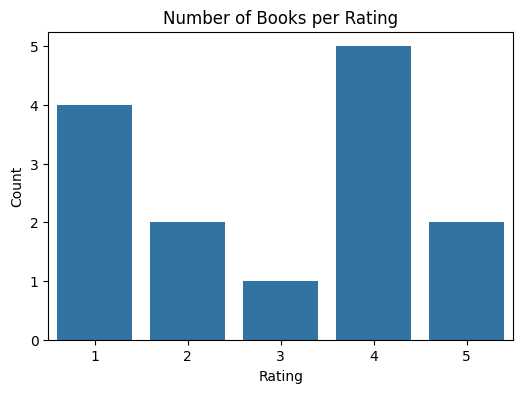

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df)
plt.title('Number of Books per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Top Rated Books with Links

### Top Rated and Most Expensive Books

In [ ]:
top_books = df.sort_values(by=['Rating', 'Price Value'], ascending=[False, False])
top_books[['Title', 'Rating', 'Price Value', 'Link']].head(5)

,Title,Rating,Price Value,Link
1,Immunity: How Elie Metchnikoff Changed the Cou...,5,57.36,https://books.toscrape.com/catalogue/immunity-...
10,The Disappearing Spoon: And Other True Tales o...,5,57.35,https://books.toscrape.com/catalogue/the-disap...
2,Sorting the Beef from the Bull: The Science of...,4,44.74,https://books.toscrape.com/catalogue/sorting-t...
0,The Most Perfect Thing: Inside (and Outside) a...,4,42.96,https://books.toscrape.com/catalogue/the-most-...
12,Seven Brief Lessons on Physics,4,30.60,https://books.toscrape.com/catalogue/seven-bri...


### Distribution of Ratings

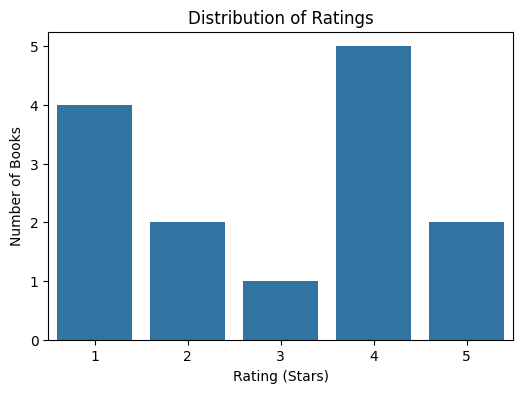

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Books')
plt.show()

### Book Prices by Rating

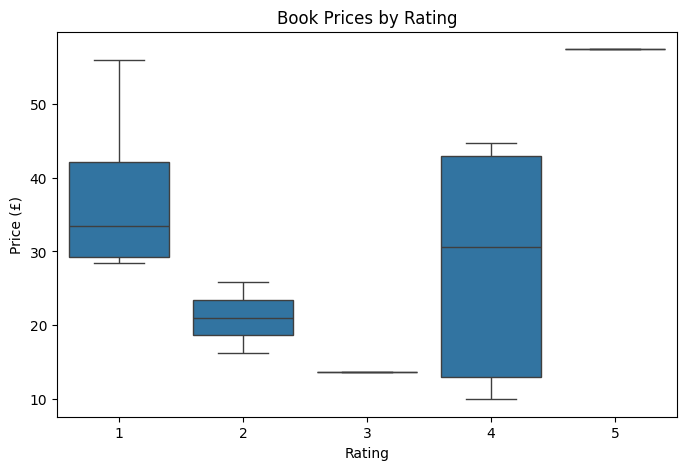

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Rating', y='Price Value')
plt.title('Book Prices by Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()

### Rating vs Price

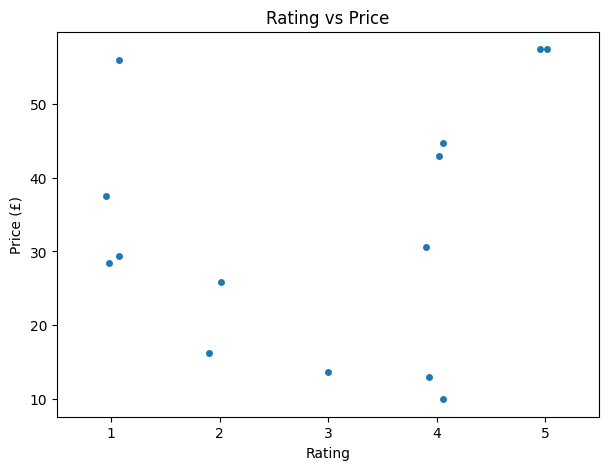

In [ ]:
plt.figure(figsize=(7, 5))
sns.stripplot(data=df, x='Rating', y='Price Value', jitter=True)
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()

### Rating Distribution Pie Chart

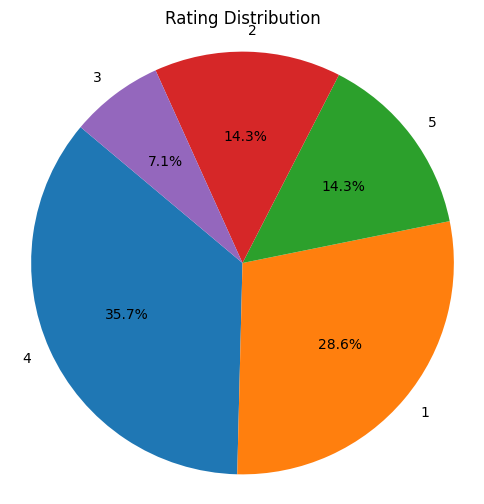

In [ ]:
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Extract number of available copies from 'Availability'
import re
df['Availability Count'] = df['Availability'].apply(
    lambda x: int(re.search(r'(\d+)', x).group(1)) if re.search(r'(\d+)', x) else 0
)

## Exploratory Data Analysis

In [ ]:
df['Price Value'].describe()


count    14.000000
mean     33.088571
std      16.725702
min      10.010000
25%      18.667500
50%      30.025000
75%      44.295000
max      57.360000
Name: Price Value, dtype: float64

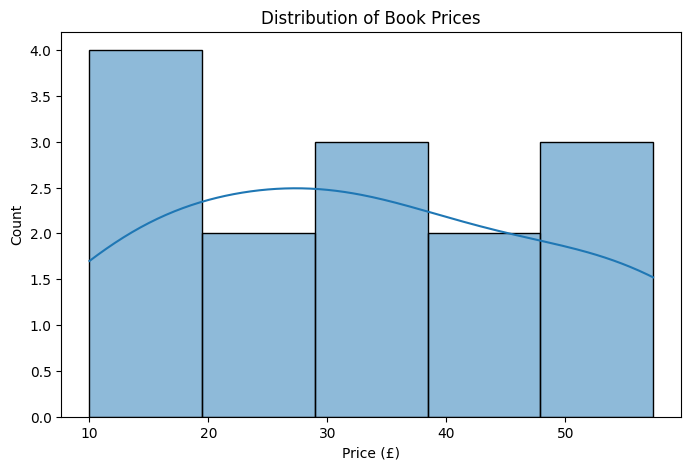

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price Value'], kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

### Step 11.6: Top 10 Most Expensive Books

In [ ]:
df.sort_values(by='Price Value', ascending=False).head(10)

,Title,Price,Availability,Rating,Link,In Stock,Price Range,Price Value
1,Immunity: How Elie Metchnikoff Changed the Cou...,£57.36,In stock,5,https://books.toscrape.com/catalogue/immunity-...,True,high,57.36
10,The Disappearing Spoon: And Other True Tales o...,£57.35,In stock,5,https://books.toscrape.com/catalogue/the-disap...,True,high,57.35
4,"The Fabric of the Cosmos: Space, Time, and the...",£55.91,In stock,1,https://books.toscrape.com/catalogue/the-fabri...,True,high,55.91
2,Sorting the Beef from the Bull: The Science of...,£44.74,In stock,4,https://books.toscrape.com/catalogue/sorting-t...,True,high,44.74
0,The Most Perfect Thing: Inside (and Outside) a...,£42.96,In stock,4,https://books.toscrape.com/catalogue/the-most-...,True,high,42.96
3,Tipping Point for Planet Earth: How Close Are ...,£37.55,In stock,1,https://books.toscrape.com/catalogue/tipping-p...,True,high,37.55
12,Seven Brief Lessons on Physics,£30.60,In stock,4,https://books.toscrape.com/catalogue/seven-bri...,True,medium,30.60
13,The Selfish Gene,£29.45,In stock,1,https://books.toscrape.com/catalogue/the-selfi...,True,medium,29.45
5,Diary of a Citizen Scientist: Chasing Tiger Be...,£28.41,In stock,1,https://books.toscrape.com/catalogue/diary-of-...,True,medium,28.41
11,"Surely You're Joking, Mr. Feynman!: Adventures...",£25.83,In stock,2,https://books.toscrape.com/catalogue/surely-yo...,True,medium,25.83


### Step 11.7: Save Cleaned Data

In [ ]:
df.to_csv('clean_data_.csv', index=False)